In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import keras

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [ ]:
image_dataset = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Tomato_PlantVillage',
                                                    image_size = (IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size = BATCH_SIZE,
                                                    shuffle = True)

Found 16031 files belonging to 10 classes.


In [ ]:
labels = image_dataset.class_names

In [ ]:
labels

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [ ]:
class_names = labels

In [ ]:
len(image_dataset)

501

<ipython-input-8-fd846d45eddb>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3,4,i+1)


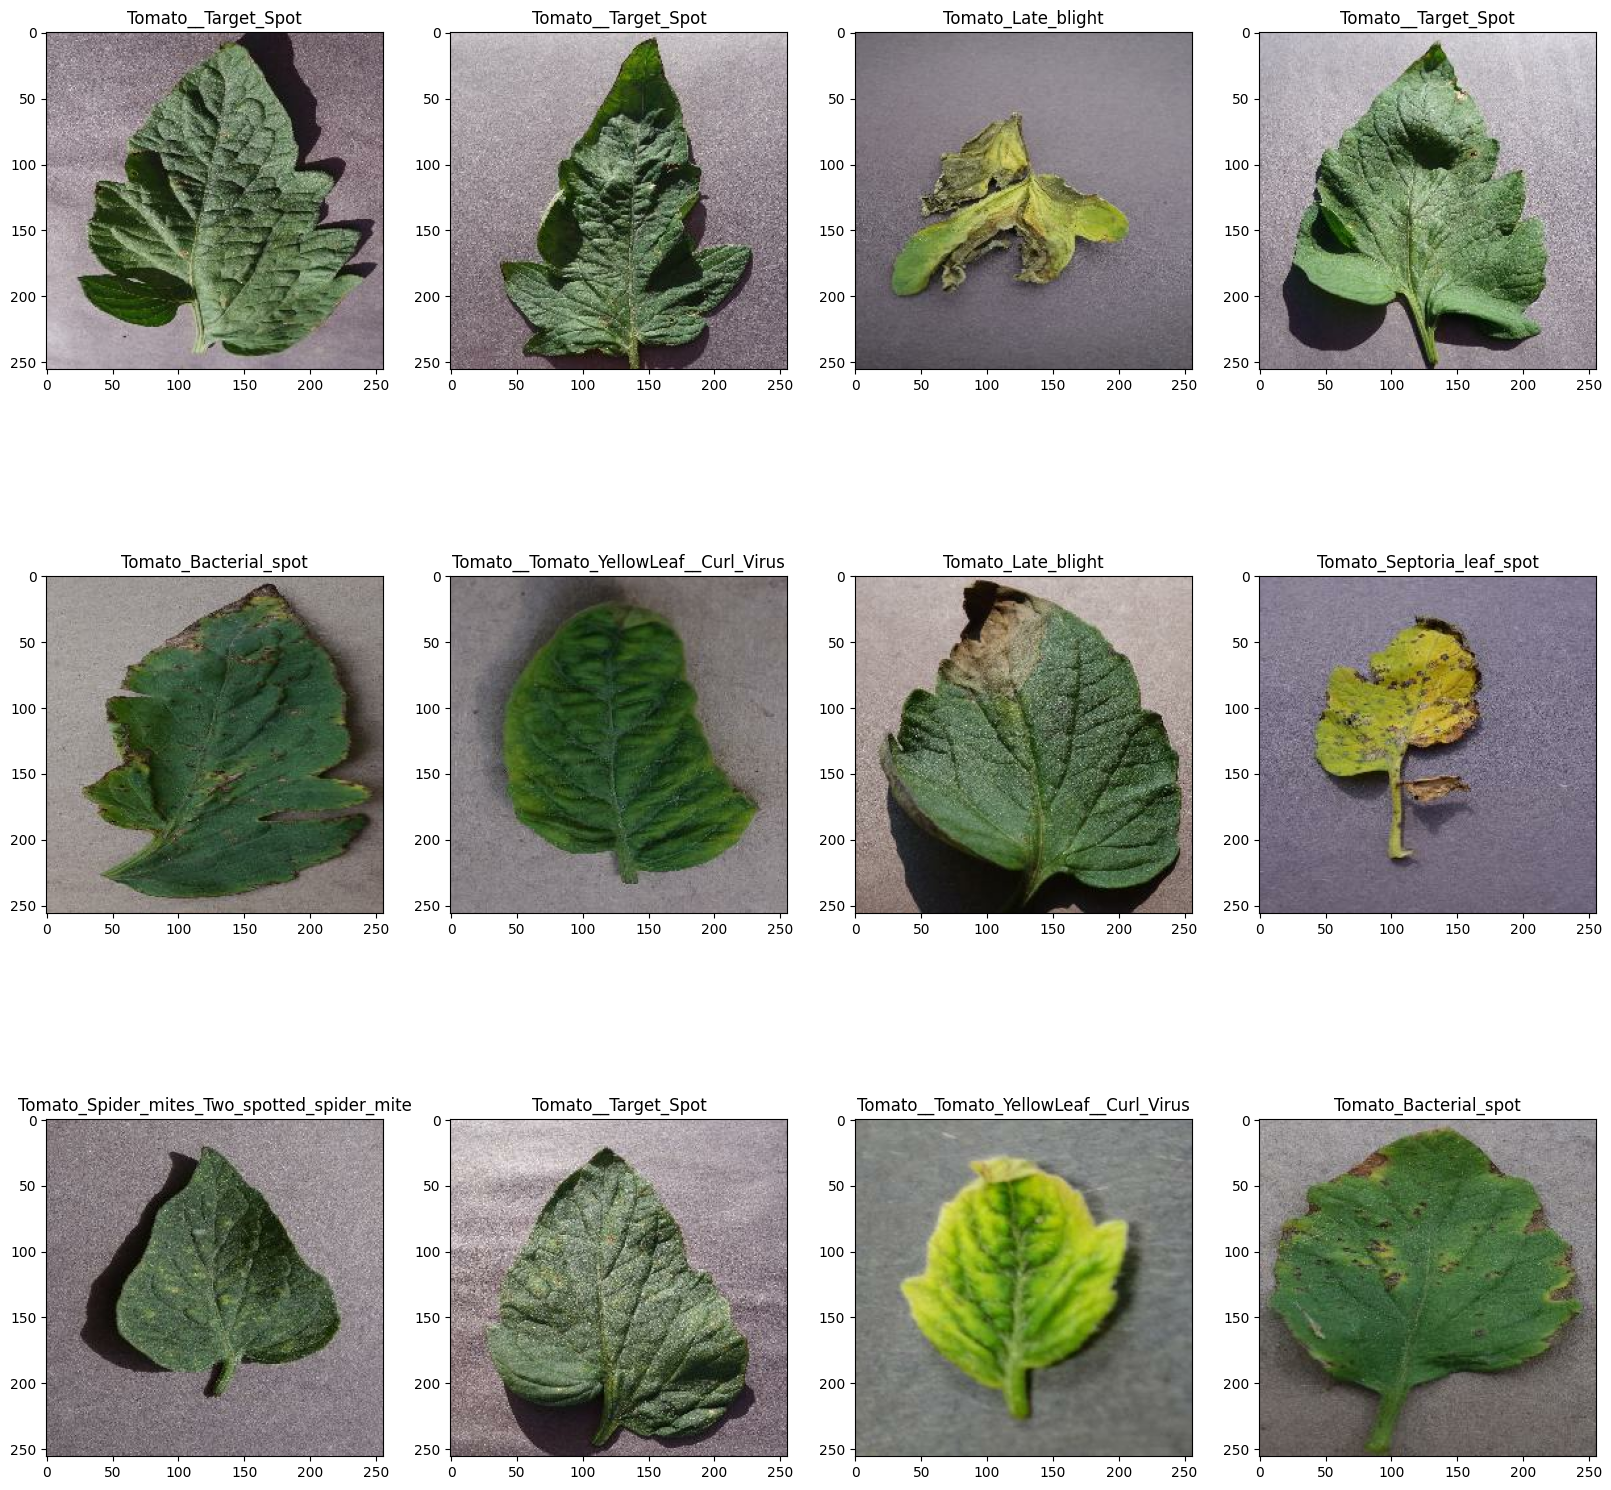

In [ ]:
plt.subplots(figsize = (20,20))
for image_batch, label_batch in image_dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(labels[label_batch[i]])

In [ ]:
def get_train_test_val_data(data, train_split = 0.8, rem_split = 0.2, test_split = 0.1, shuffle = True, shuffle_size = 10000):
  training_size = int(len(data)*train_split)
  remaining_size = int(len(data)*rem_split)
  test_size = int(len(data)*test_split)
  training_data = data.take(training_size)
  remaining_data = data.skip(training_size)
  test_data = remaining_data.take(test_size)
  validation_data = remaining_data.skip(test_size)

  return training_data, validation_data, test_data

In [ ]:
training_data, validation_data, test_data = get_train_test_val_data(image_dataset)

In [ ]:
len(training_data)

400

In [ ]:
len(validation_data)

51

In [ ]:
len(test_data)

50

In [ ]:
training_data = training_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
validation_data = validation_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_data = test_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
preprocessing = tf.keras.Sequential([ layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
                                      layers.experimental.preprocessing.Rescaling(1./255),
                                      layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
                                      layers.experimental.preprocessing.RandomRotation(0.2),
                                      layers.experimental.preprocessing.RandomZoom(0.2),
                                      ])

In [ ]:
input_shape  = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,3)
model = models.Sequential([preprocessing,
                           layers.Conv2D(32, (3,3), activation = 'relu'),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(64, (3,3)),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(64, (3,3)),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(64, (3,3)),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(64, (3,3)),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(64, (3,3)),
                           layers.MaxPooling2D((2,2)),
                           layers.Flatten(),
                           layers.Dense(64, activation = 'relu') ,
                           layers.Dense(len(labels), activation = 'softmax')
                           ])

model.build(input_shape=input_shape)

In [ ]:
opt = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'], )

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (32, 60, 60, 64)         

In [ ]:
#70 epochs, re-ran after 50 epochs
history = model.fit(training_data, epochs = 20, validation_data = validation_data, verbose = 1, batch_size = BATCH_SIZE)

Epoch 1/20
400/400 [==============================] - 26s 60ms/step - loss: 1.4152 - accuracy: 0.5213 - val_loss: 1.2871 - val_accuracy: 0.5953
Epoch 2/20
400/400 [==============================] - 24s 60ms/step - loss: 0.9061 - accuracy: 0.6856 - val_loss: 2.2862 - val_accuracy: 0.5120
Epoch 3/20
400/400 [==============================] - 24s 61ms/step - loss: 0.7224 - accuracy: 0.7483 - val_loss: 1.3204 - val_accuracy: 0.6266
Epoch 4/20
400/400 [==============================] - 24s 61ms/step - loss: 0.6428 - accuracy: 0.7759 - val_loss: 1.7169 - val_accuracy: 0.6358
Epoch 5/20
400/400 [==============================] - 24s 60ms/step - loss: 0.5596 - accuracy: 0.8043 - val_loss: 0.8059 - val_accuracy: 0.7308
Epoch 6/20
400/400 [==============================] - 24s 61ms/step - loss: 0.4669 - accuracy: 0.8363 - val_loss: 2.2317 - val_accuracy: 0.5616
Epoch 7/20
400/400 [==============================] - 24s 61ms/step - loss: 0.4110 - accuracy: 0.8589 - val_loss: 1.1309 - val_accuracy:

In [ ]:
model.evaluate(test_data)

50/50 [==============================] - 1s 22ms/step - loss: 0.4730 - accuracy: 0.8719


[0.47303304076194763, 0.871874988079071]

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(20)

Text(0.5, 1.0, 'Training and Validation Accuracy')

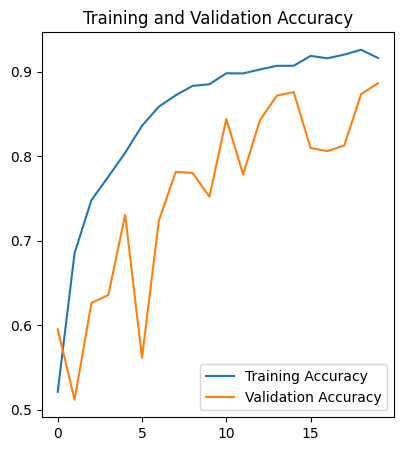

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, accuracy, label = 'Training Accuracy')
plt.plot(epochs_range, val_accuracy, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

In [ ]:
pwd

'/content'

In [ ]:
#model.save(f"/content/drive/MyDrive/models/1")
model.save("my_trained_tomato_model.h5")

In [ ]:
def predict(model,img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0)
  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence

1/1 [==============================] - 0s 17ms/step


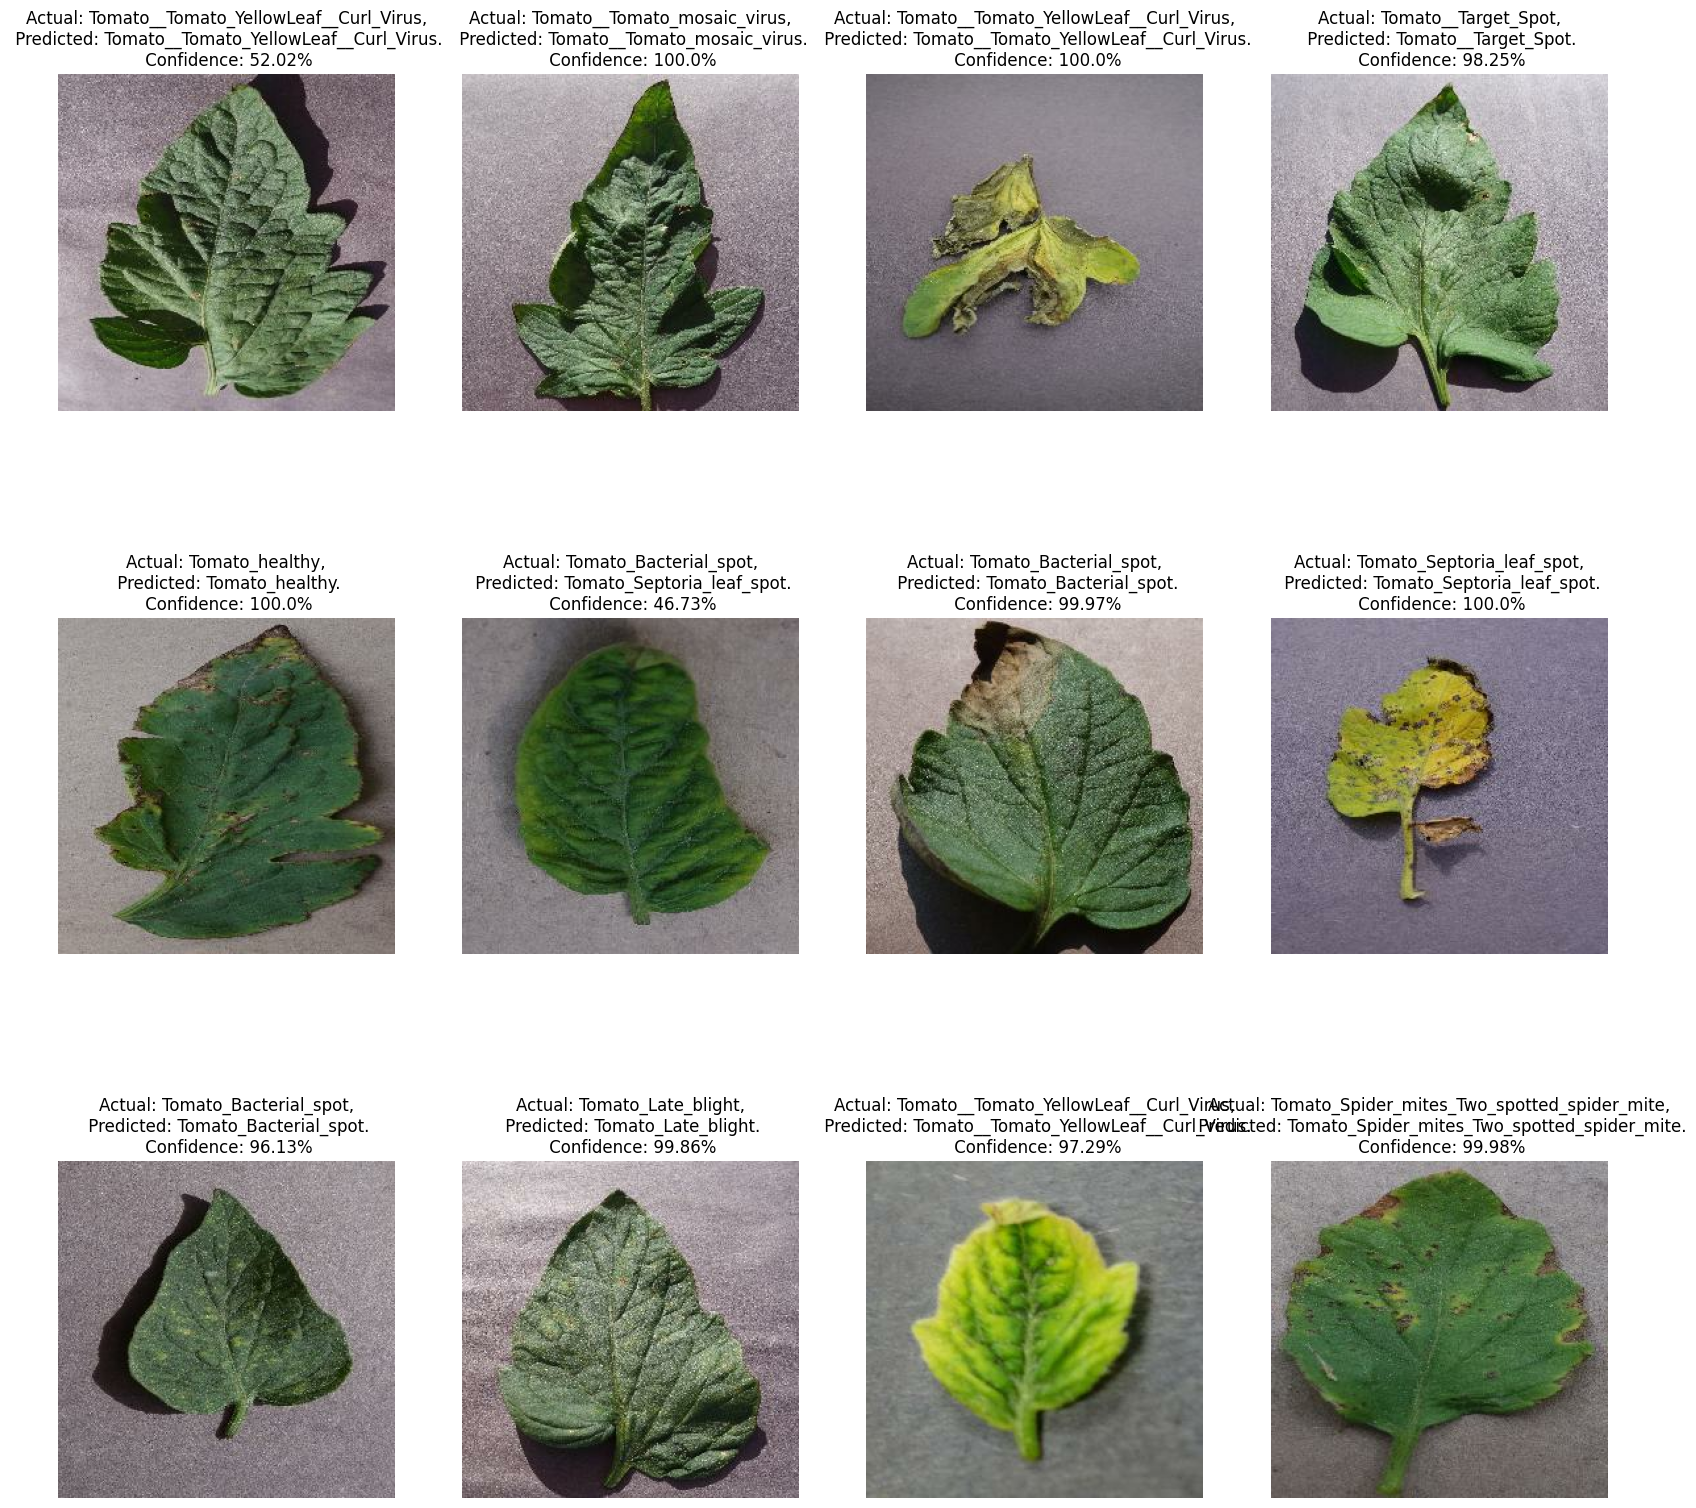

In [ ]:
plt.figure(figsize = (20,20))
for images, labels in test_data.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))

    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

    plt.axis('off')

In [ ]:
!python --version

Python 3.10.12
